
#### RITI KUMARI
#### sinhariti61@gmail.com

### STOCK ANALYSIS 

In [1]:
### Loads in modules for this script 

from datetime import datetime
from datetime import timedelta

from pandas import DataFrame
import pandas as pd
import numpy as np
import math

import os

### Data visualizations

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

import seaborn as sns
import pylab

### Data Prediction

from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
os.chdir('stock-time-series1')

### Q1. Load in all stock tickers

##### The stock data has been stored in the current directory.
##### The files have been uploaded individually.

In [4]:
AABA  = pd.read_csv("AABA_2006-01-01_to_2018-01-01.csv")
AAPL  = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
AMZN  = pd.read_csv("AMZN_2006-01-01_to_2018-01-01.csv")
AXP   = pd.read_csv("AXP_2006-01-01_to_2018-01-01.csv")
BA    = pd.read_csv("BA_2006-01-01_to_2018-01-01.csv")
CAT   = pd.read_csv("CAT_2006-01-01_to_2018-01-01.csv")
CSCO  = pd.read_csv("CSCO_2006-01-01_to_2018-01-01.csv")
CVX   = pd.read_csv("CVX_2006-01-01_to_2018-01-01.csv")
DIS   = pd.read_csv("DIS_2006-01-01_to_2018-01-01.csv")
GE    = pd.read_csv("GE_2006-01-01_to_2018-01-01.csv")
GOOGL = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")
GS    = pd.read_csv("GS_2006-01-01_to_2018-01-01.csv")
HD    = pd.read_csv("HD_2006-01-01_to_2018-01-01.csv")
IBM   = pd.read_csv("IBM_2006-01-01_to_2018-01-01.csv")
INTC  = pd.read_csv("INTC_2006-01-01_to_2018-01-01.csv")
JNJ   = pd.read_csv("JNJ_2006-01-01_to_2018-01-01.csv")
JPM   = pd.read_csv("JPM_2006-01-01_to_2018-01-01.csv")
KO    = pd.read_csv("KO_2006-01-01_to_2018-01-01.csv")
MCD   = pd.read_csv("MCD_2006-01-01_to_2018-01-01.csv")
MMM   = pd.read_csv("MMM_2006-01-01_to_2018-01-01.csv")
MRK   = pd.read_csv("MRK_2006-01-01_to_2018-01-01.csv")
MSFT  = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
NKE   = pd.read_csv("NKE_2006-01-01_to_2018-01-01.csv")
PFE   = pd.read_csv("PFE_2006-01-01_to_2018-01-01.csv")
PG    = pd.read_csv("PG_2006-01-01_to_2018-01-01.csv")
TRV   = pd.read_csv("TRV_2006-01-01_to_2018-01-01.csv")
UNH   = pd.read_csv("UNH_2006-01-01_to_2018-01-01.csv")
UTX   = pd.read_csv("UTX_2006-01-01_to_2018-01-01.csv")
VZ    = pd.read_csv("VZ_2006-01-01_to_2018-01-01.csv")
WMT   = pd.read_csv("WMT_2006-01-01_to_2018-01-01.csv")
XOM   = pd.read_csv("XOM_2006-01-01_to_2018-01-01.csv")

In [5]:
AMZN.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [6]:
GE.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,35.10,35.40,34.80,35.37,33221400,GE
1,2006-01-04,35.35,35.40,35.10,35.32,24017300,GE
2,2006-01-05,35.27,35.35,35.10,35.23,18860400,GE
3,2006-01-06,35.38,35.53,35.19,35.47,22085300,GE
4,2006-01-09,35.40,35.43,35.24,35.38,20716900,GE


In [7]:
MSFT.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


In [8]:
GOOGL.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [9]:
GS.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,126.70,129.44,124.23,128.87,6188700,GS
1,2006-01-04,127.35,128.91,126.38,127.09,4862000,GS
2,2006-01-05,126.00,127.32,125.61,127.04,3717600,GS
3,2006-01-06,127.29,129.25,127.29,128.84,4319600,GS
4,2006-01-09,128.50,130.62,128.00,130.39,4723500,GS


### Q2. Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

#### All tickers data have been merged in All_stock file and the same has been uploaded using ``pd.csv``. All the stock data been aggregated as per the ticker. The average for Open, High, Low, Close and Volume for each ticker has been taken into consideration. The aggregated value has been plotted using bar plot. 
#### There has been 5 subplots.                                                                                                                                                                    As per the below graphs, we see that the average price for ``Amazon and Google`` has leading in the market.                            However, people are buying more stocks for ``Apple and GE``.                                                                                                                    The trades for Amazon and Google has been less as compared to the Apple and GE.

Text(0,0.5,'Average Volume (in 10k)')

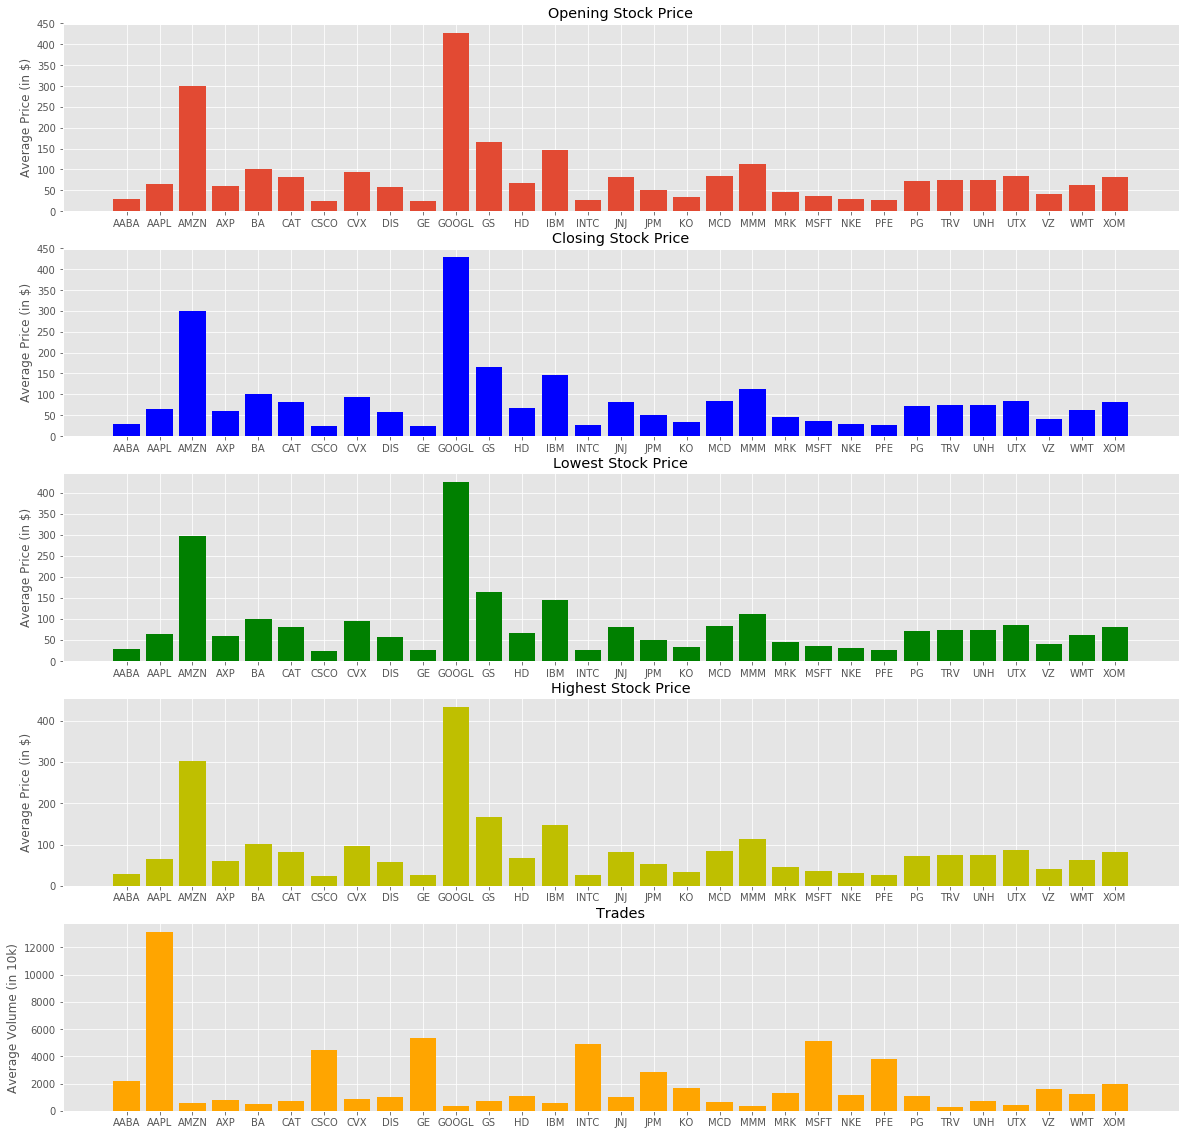

In [10]:
AllStock = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")

AllStock['Date'] = pd.to_datetime(AllStock['Date'])
AllStock['Day'] = AllStock['Date'].dt.day
AllStock['Month'] = AllStock['Date'].dt.month
AllStock['MonthName'] = AllStock['Date'].dt.strftime("%B")
AllStock['Year'] = AllStock['Date'].dt.year
AllStock['Quarter'] = AllStock['Date'].dt.quarter

# Aggregation of AllStock ticker data
AllStock = AllStock.groupby(['Name'],as_index=True).agg({"Open" : "mean" , "High" : "mean", "Low" : "mean","Close" : "mean" ,"Volume" : "mean"})

plt.figure(figsize=(20,20))

# Sorting of data to get the required plot
AllStock = AllStock.sort_values('Open',ascending=False)

# Plotting of data
# Plot 1
plt.subplot(5,1,1)
plt.bar(AllStock.index, AllStock['Open'])
plt.title('Opening Stock Price')
plt.ylabel('Average Price (in $)')

# Plot 2
plt.subplot(5,1,2)
plt.bar(AllStock.index, AllStock['Close'], color = 'b')
plt.title('Closing Stock Price')
plt.ylabel('Average Price (in $)')

# Plot 3
plt.subplot(5,1,3)
plt.bar(AllStock.index, AllStock['Low'], color='g')
plt.title('Lowest Stock Price')
plt.ylabel('Average Price (in $)')

# Plot 4
plt.subplot(5,1,4)
plt.bar(AllStock.index, AllStock['High'], color='y')
plt.title('Highest Stock Price')
plt.ylabel('Average Price (in $)')

# Plot 5
AllStock = AllStock.sort_values('Volume',ascending=False)
plt.subplot(5,1,5)
plt.bar(AllStock.index, AllStock['Volume']/10000, color='orange')
plt.title('Trades')
plt.ylabel('Average Volume (in 10k)')



#### There has been 5 subplots. As per the below graphs, we see that the average price for ``Amazon and Google`` has leading in the market. However, people are buying more stocks for ``GE and Apple``. The trades for Amazon and Google has been less as compared to the Apple and GE.

Text(0,0.5,'Average Volume (in 10k)')

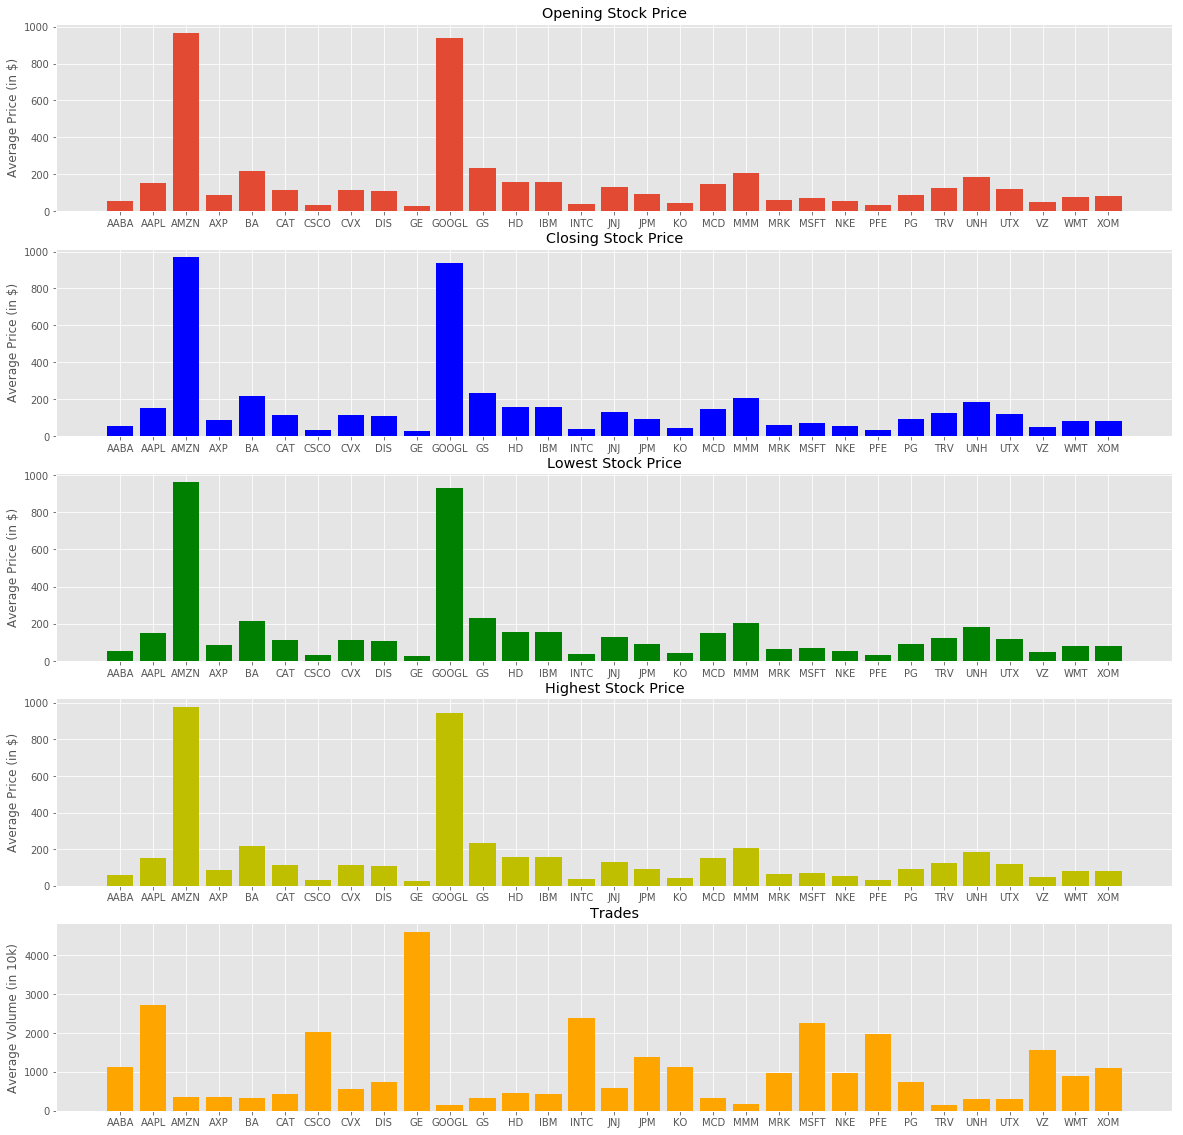

In [11]:
AllStock = pd.read_csv("all_stocks_2017-01-01_to_2018-01-01.csv")
AllStock['Date'] = pd.to_datetime(AllStock['Date'])
AllStock['Day'] = AllStock['Date'].dt.day
AllStock['Month'] = AllStock['Date'].dt.month
AllStock['MonthName'] = AllStock['Date'].dt.strftime("%B")
AllStock['Year'] = AllStock['Date'].dt.year
AllStock['Quarter'] = AllStock['Date'].dt.quarter

AllStock = AllStock.groupby(['Name'],as_index=True).agg({"Open" : "mean" , "High" : "mean", "Low" : "mean","Close" : "mean" ,"Volume" : "mean"})

plt.figure(figsize=(20,20))


AllStock = AllStock.sort_values('Open',ascending=False)

# Plot 1
plt.subplot(5,1,1)
plt.bar(AllStock.index, AllStock['Open'])
plt.title('Opening Stock Price')
plt.ylabel('Average Price (in $)')

# Plot 2
plt.subplot(5,1,2)
plt.bar(AllStock.index, AllStock['Close'], color = 'b')
plt.title('Closing Stock Price')
plt.ylabel('Average Price (in $)')

# Plot 3
plt.subplot(5,1,3)
plt.bar(AllStock.index, AllStock['Low'], color='g')
plt.title('Lowest Stock Price')
plt.ylabel('Average Price (in $)')

# Plot 4
plt.subplot(5,1,4)
plt.bar(AllStock.index, AllStock['High'], color='y')
plt.title('Highest Stock Price')
plt.ylabel('Average Price (in $)')

AllStock = AllStock.sort_values('Volume',ascending=False)

# Plot 5
plt.subplot(5,1,5)
plt.bar(AllStock.index, AllStock['Volume']/10000, color='orange')
plt.title('Trades')
plt.ylabel('Average Volume (in 10k)')


#### All ticker's data for the year 2006-2018 has been used. The Plot fill has been used to show the min and max value for the Open stock price. 

Text(0.5,1,'Open Stock Price \n 2006-2018')

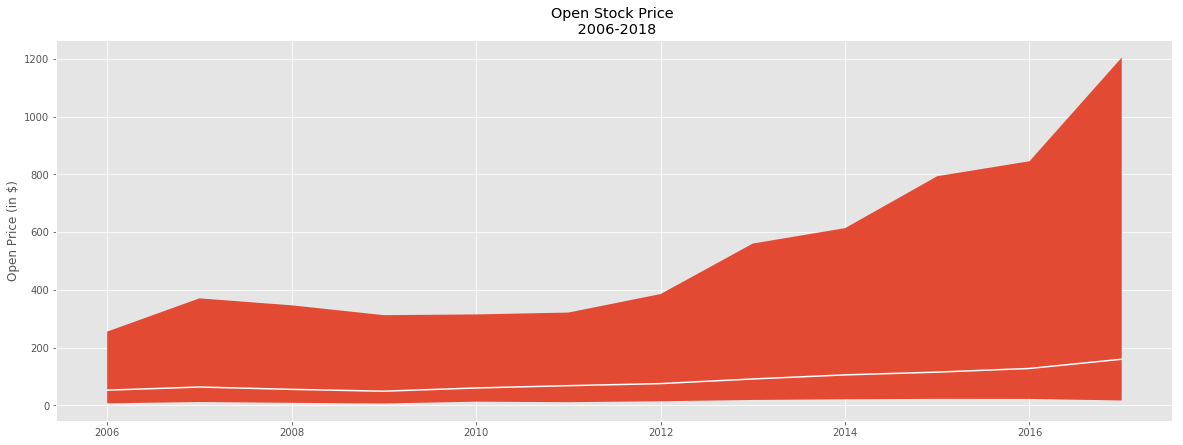

In [12]:
AllStock = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")

AllStock['Date'] = pd.to_datetime(AllStock['Date'])
AllStock['Year'] = AllStock['Date'].dt.year

AllStock = AllStock.groupby('Year')['Open'].agg({'Low':'min','High':'max','Mean':'mean'})

AllStock.reset_index(inplace=True)

# Plot
plt.figure(figsize=(20,7))
plt.plot(AllStock['Year'],AllStock['Mean'], c="white")
plt.fill_between(x='Year',y1='Low',y2='High', data=AllStock)
plt.ylabel("Open Price (in $)")
plt.title("Open Stock Price \n 2006-2018")

### Q3. Descriptive analysis (Min, Max, explore some moving averages over the time) and comparison of two stocks

### Amazon & Google Stock Price Trend over the year 2006-2018

#### For the further descriptive analysis, the stock for Amazon and Google is taken. The Close Price shows the stock price at the end of the day. Similarly, the trade volume for Amazon and Google has been plotted.

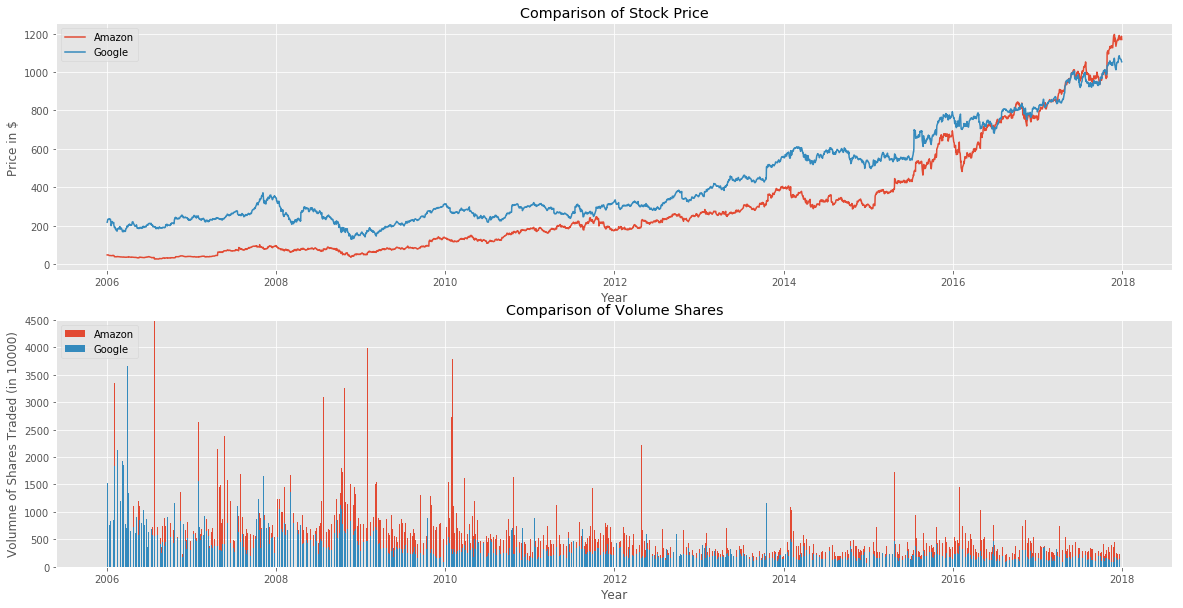

In [14]:
AMZN  = pd.read_csv("AMZN_2006-01-01_to_2018-01-01.csv")
GOOGL = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")

AMZN['Date'] = pd.to_datetime(AMZN['Date'])
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])

AMZN.set_index('Date',inplace =True)
GOOGL.set_index('Date',inplace =True)

plt.figure(figsize=(20,10))

# Plot to compare the Close price for both the companies.
plt.subplot(2,1,1)
plt.plot(AMZN.index, AMZN['Close'], label = "Amazon")
plt.plot(GOOGL.index, GOOGL['Close'], label = "Google")
plt.xlabel("Year")
plt.ylabel("Price in $")
plt.title("Comparison of Stock Price")
plt.legend()

# Plot to compare the Share Volume for both the companies.
plt.subplot(2,1,2)
plt.bar(AMZN.index, AMZN['Volume']/10000, label = "Amazon")
plt.bar(GOOGL.index, GOOGL['Volume']/10000, label = "Google")
plt.ylim(0,4500)
plt.xlabel("Year")
plt.ylabel("Volumne of Shares Traded (in 10000)")
plt.title("Comparison of Volume Shares")
plt.legend(loc="upper left")

### Stock Price Prediction for Amazon & Google

#### The stock price has been predicted for Amazon and Google. initially, the dataset had been splitted into train data and test data. A linear regression model has been created using train data with 94% of accuracy. The forecast has been predicted for the 30 days. Once, the model has been trained, the array for the date for the next 30 daya has been created and respectively, their forecasted value has been concatenated.
#### As we know, the increase in stock price from ``2`` to ``4`` is not similar as ``4`` to ``6``. For the prior case, the price doubled but for the later, the change is not even half. To get the more accurate model, the High Low percent change and Close open percent change has been calculated. 
#### The plot for Amazon and Google Stock price and the forecasted price has been has been plotted. The plot clearly states the more increase in stock price for Amazon as compared to Google.

In [15]:
#Amazon Price Prediction
amazon1 = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')

# Calculation of Change Percentage 
amazon1['HL_Pchange'] = (amazon1['High'] - amazon1['Low']) / amazon1['Close'] * 100.0
amazon1['CO_Pchange'] = (amazon1['Close'] - amazon1['Open']) / amazon1['Open'] * 100.0
amazon = amazon1[['Close', 'HL_Pchange', 'CO_Pchange', 'Volume']]

forecast_col = 'Close'
forecast_out = 30
amazon['label'] = amazon[forecast_col].shift(-forecast_out)

x = np.array(amazon.drop(['label'], 1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

amazon.dropna(inplace=True)
y = np.array(amazon['label'])

# Splitting the train and test dataset
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

# Linear Regression Model
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)

confidence = clf.score(x_test, y_test)

# Predict the output dataset
forecast_set = clf.predict(x_lately)

amazon['Forecast'] = np.nan

# Creation of next time-series data for forecasting model
last_date = amazon1.iloc[-1].Date
last_unix = pd.to_datetime(last_date)
next_unix = last_unix + timedelta(days=1)

# Filling of the data in their respective time-series
for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    amazon.loc[next_date] = [np.nan for _ in range(len(amazon.columns)-1)]+[i]

#Google Price Prediction
GOOGL1 = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")

# Calculation of Change Percentage 
GOOGL1['HL_Pchange'] = (GOOGL1['High'] - GOOGL1['Low']) / GOOGL1['Close'] * 100.0
GOOGL1['CO_Pchange'] = (GOOGL1['Close'] - GOOGL1['Open']) / GOOGL1['Open'] * 100.0
GOOGL = GOOGL1[['Close', 'HL_Pchange', 'CO_Pchange', 'Volume']]

forecast_col = 'Close'
forecast_out = 30
GOOGL['label'] = GOOGL[forecast_col].shift(-forecast_out)

x = np.array(GOOGL.drop(['label'], 1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

GOOGL.dropna(inplace=True)
y = np.array(GOOGL['label'])

# Splitting the train and test dataset
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

# Linear Regression Model
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)

confidence = clf.score(x_test, y_test)

# Predict the output dataset
forecast_set = clf.predict(x_lately)

GOOGL['Forecast'] = np.nan

# Creation of next time-series data for forecasting model
last_date = GOOGL1.iloc[-1].Date
last_unix = pd.to_datetime(last_date)
next_unix = last_unix + timedelta(days=1)

# Filling of the data in their respective time-series
for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    GOOGL.loc[next_date] = [np.nan for _ in range(len(GOOGL.columns)-1)]+[i]

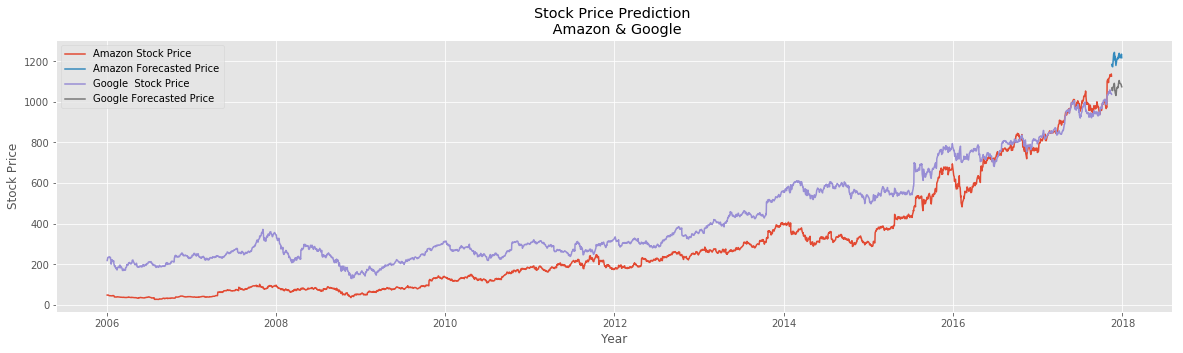

In [15]:
# Plotting of Forecasted model
AMZN  = pd.read_csv("AMZN_2006-01-01_to_2018-01-01.csv")
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZN.set_index('Date',inplace =True)

plt.figure(figsize=(20,5))
plt.plot(AMZN.index, amazon['Close'], label = "Amazon Stock Price")
plt.plot(AMZN.index, amazon['Forecast'], label = "Amazon Forecasted Price")
plt.plot(AMZN.index, GOOGL['Close'], label = "Google  Stock Price")
plt.plot(AMZN.index, GOOGL['Forecast'], label = "Google Forecasted Price")

plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title("Stock Price Prediction \n Amazon & Google")
plt.show()

### Simple Moving Average for Trend Prediction 
#### Amazon & Google (Last 100days)

#### A simple moving average (SMA )is an arithmetic moving average calculated by adding recent closing prices and then dividing that by the number of time periods in the calculation average. Moving averages are lagging indicators, they fit in the category of trend following indicators. The moving average gives more accurate results as the number of periods is increased.
#### For the below plot, 100 days has been used as rolling window. As per the below plot, the stock price for Google was more as compared to Amazon in the year 2006. But in the following years, the stock price for Amazon increased. 

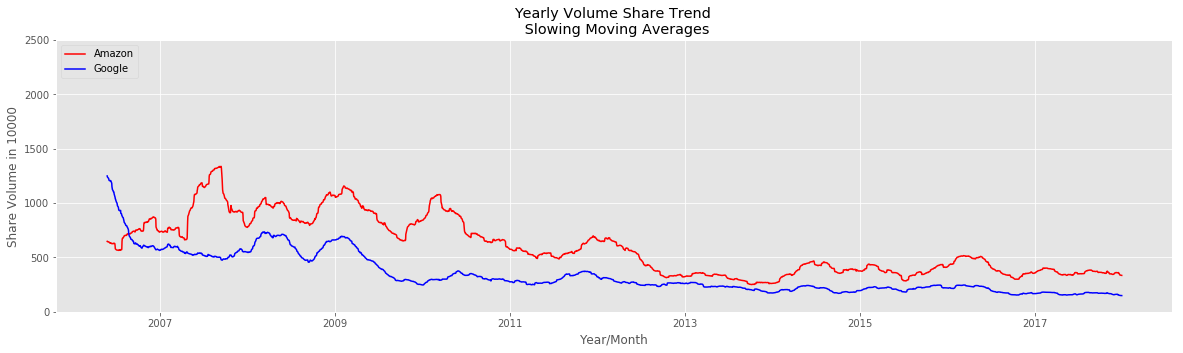

In [16]:
AMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
GOOGL = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")

AMZN2 = AMZN
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZN['Day'] = AMZN['Date'].dt.day
AMZN['Month'] = AMZN['Date'].dt.month
AMZN['MonthName'] = AMZN['Date'].dt.strftime("%B")
AMZN['Year'] = AMZN['Date'].dt.year
AMZN['Quarter'] = AMZN['Date'].dt.quarter

# Calculating Moving Average Volume (Amazon)
AMZNsma100 = AMZN2['Volume'].rolling(100).mean() #100 days
AMZNsma50 = AMZN2['Volume'].rolling(50).mean() #50 days
AMZNsma30 = AMZN2['Volume'].rolling(30).mean() #30 days

# Calculating Moving Average Volume (Google)
GOOGLsma100 = GOOGL['Volume'].rolling(100).mean() #100 days
GOOGLsma50 = GOOGL['Volume'].rolling(50).mean() #50 days
GOOGLsma30 = GOOGL['Volume'].rolling(30).mean() #30 days

# Plotting of Volume of shares over the period
AMZN.set_index('Date',inplace =True)
plt.figure(figsize=(20,5), linewidth=2)
plt.ylim(0, 2500)

# The slowing movie average has been scaled for 10K 
plt.plot(AMZN.index, AMZNsma100/10000, color ='r', label= "Amazon")
plt.plot(AMZN.index, GOOGLsma100/10000, color ='b', label= "Google")

plt.xlabel("Year/Month")
plt.ylabel("Share Volume in 10000")
plt.title("Yearly Volume Share Trend \n Slowing Moving Averages")
plt.legend(loc="upper left")
plt.show()

#### The support line has been considered as the lowest price for the last 5 years.  The increase trend from the support line shows the increase in stock demand for Amazon

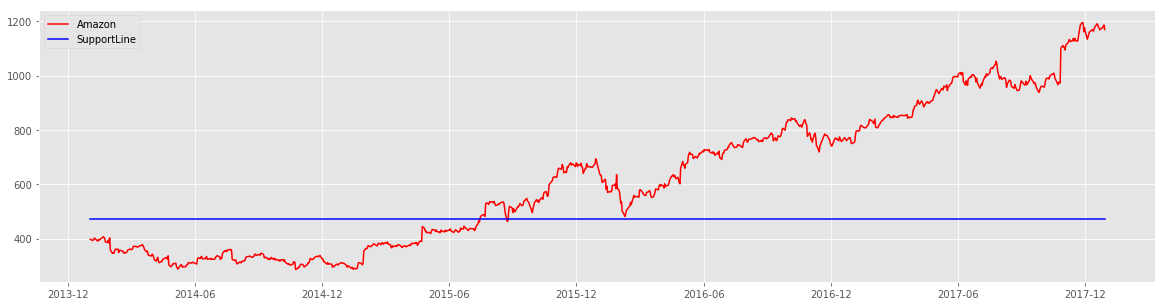

In [17]:
AMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
GOOGL = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")


AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZN['Day'] = AMZN['Date'].dt.day
AMZN['Month'] = AMZN['Date'].dt.month
AMZN['MonthName'] = AMZN['Date'].dt.strftime("%B")
AMZN['Year'] = AMZN['Date'].dt.year
AMZN['Quarter'] = AMZN['Date'].dt.quarter
AMZN = AMZN[AMZN['Year']>2013]

AMZN['support'] = AMZN[AMZN['Year']>2015]['Low'].min()
AMZN.set_index('Date')


plt.figure(figsize=(20,5))
plt.plot(AMZN['Date'], AMZN['Close'], color ='r', label= "Amazon")
plt.plot(AMZN['Date'], AMZN['support'], color ='b', label= "SupportLine")
plt.legend(loc="upper left")

### Distribution of Stock Price for Amazon & Google

#### The seaborn library has been imported. This is used to create the distribution plot for Amazon & Google. As per the distribution plot, the Google has several peaks.

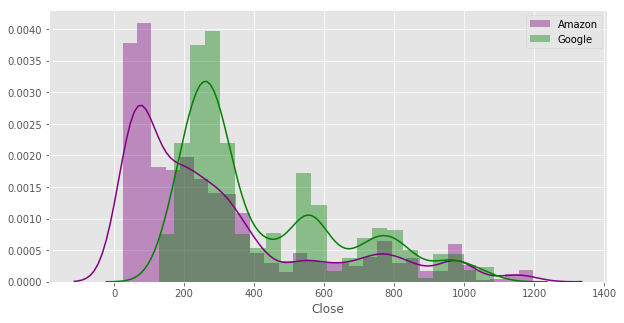

In [18]:
AMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
GOOGL = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")

plt.figure(figsize=(10,5))
sns.distplot(AMZN['Close'], color='purple', label="Amazon")
sns.distplot(GOOGL['Close'], color='green', label="Google")
plt.legend(loc="upper right")

#### A new dataframe named ``Stock`` has been created which stores the closing price for Amazon and Google. ``Stock Return`` is calculated dividend of the Close price. ``Stock Change`` is calculated in terms of the logarithmic difference between the Close price. This shows how the stock price has changed for both the companies.

Text(0.5,1,'Stock Change Analysis')

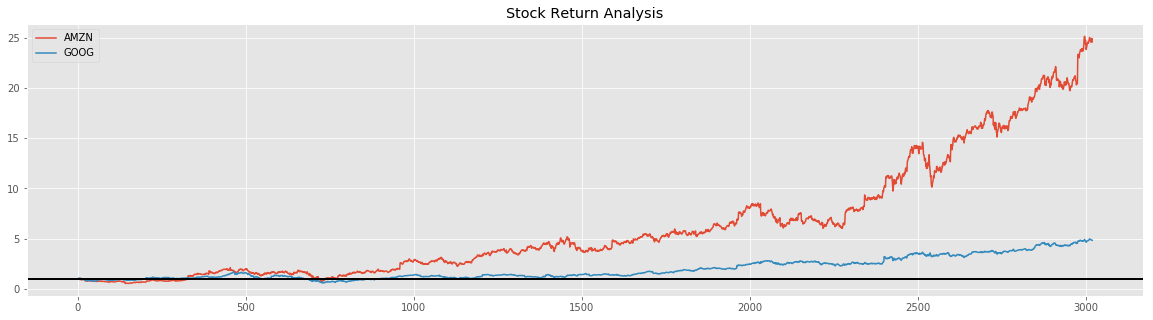

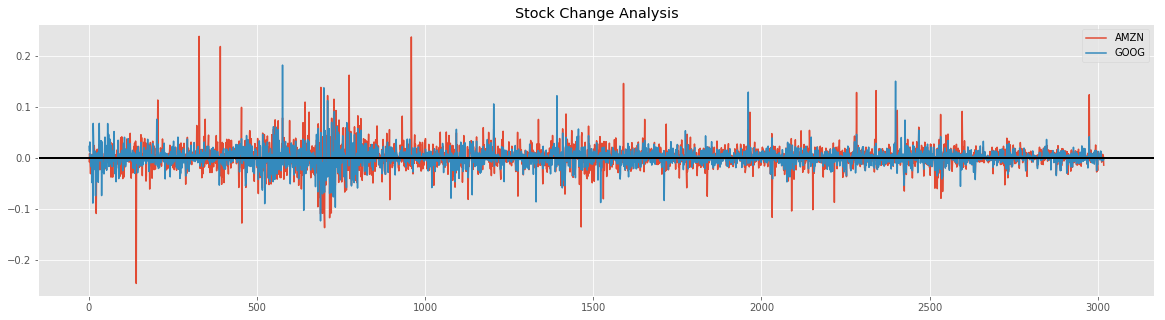

In [19]:
# File import
AMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
GOOGL = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")

# Creation of new dataframe with the Stock price of Amazon & Google
stocks = pd.DataFrame({"AMZN": AMZN["Close"],"GOOG": GOOGL["Close"]})

stock_return = stocks.apply(lambda x: x / x[0])

plt.figure(figsize=(20,5))
stock_return.plot(grid = True, figsize=(20,5)).axhline(y = 1, color = "black", lw = 2)
plt.title("Stock Return Analysis")

# Plot
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1
stock_change.plot(grid = True, figsize=(20,5)).axhline(y = 0, color = "black", lw = 2)
plt.title("Stock Change Analysis")

#### Accumulation & Depreciation comes with the change in the stock volume. If the stock volume is more than the previous day, the day is an ``Accumulation Day`` , otherwise it witnesses a depreciation in stock and hence called a ``Depreciation Day``.

#### If the accumulation volume is more than average, it shows a sign of weakness. The suggests the excess of supply and the number of investors trying to sell their shares has increased.

Text(0.5,1,'Depreciation Amount Analysis 2017 \n Google')

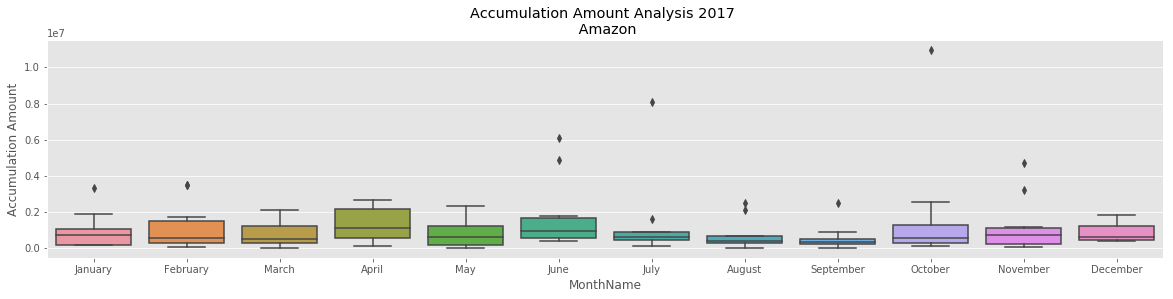

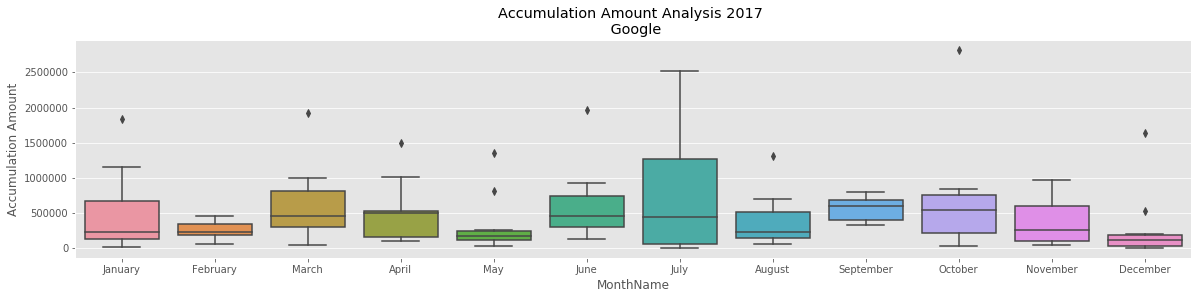

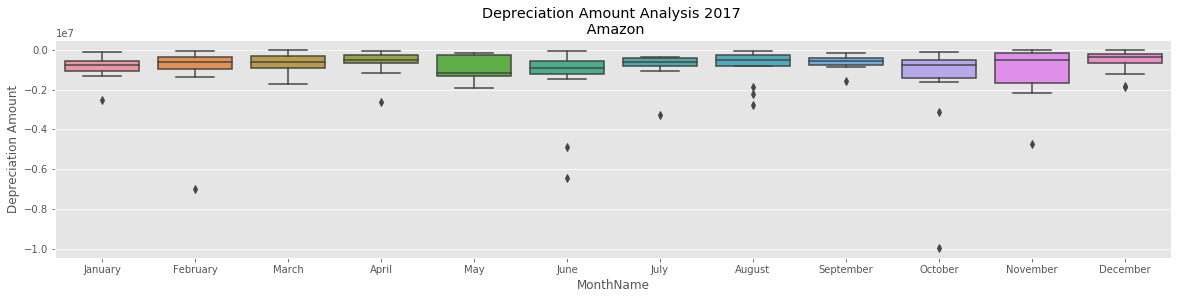

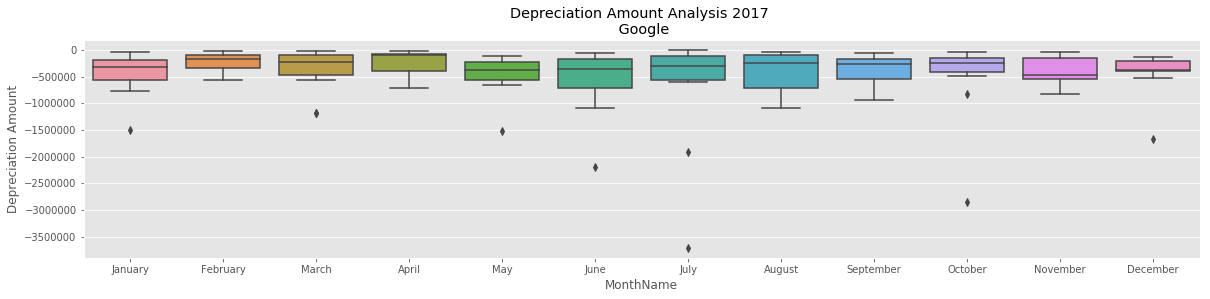

In [20]:
# Data import
AMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
GOOGL = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")

# Extracting the date part from Amazon dataset
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZN['Day'] = AMZN['Date'].dt.day
AMZN['Month'] = AMZN['Date'].dt.month
AMZN['MonthName'] = AMZN['Date'].dt.strftime("%B")
AMZN['Year'] = AMZN['Date'].dt.year
AMZN['Quarter'] = AMZN['Date'].dt.quarter

# Extracting the dataset for the year 2017 
AMZN_2017 = AMZN[AMZN['Year']==2017].reset_index()
AMZN_2017.sort_values(by='Date')

# Calculating the Volume Change
data = np.diff(AMZN_2017['Volume'], n=1)
AMZN_2017['Accumulation Amount'] = pd.concat([pd.DataFrame([0]),pd.DataFrame(data)], ignore_index=True)

# Extracting the date part from Google dataset
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])
GOOGL['Day'] = GOOGL['Date'].dt.day
GOOGL['Month'] = GOOGL['Date'].dt.month
GOOGL['MonthName'] = GOOGL['Date'].dt.strftime("%B")
GOOGL['Year'] = GOOGL['Date'].dt.year
GOOGL['Quarter'] = GOOGL['Date'].dt.quarter

# Extracting the dataset for the year 2017 
GOOGL_2017 = GOOGL[GOOGL['Year']==2017].reset_index()
GOOGL_2017.sort_values(by='Date')

# Calculating the Volume Change
data = np.diff(GOOGL_2017['Volume'], n=1)
GOOGL_2017['Accumulation Amount'] = pd.concat([pd.DataFrame([0]),pd.DataFrame(data)], ignore_index=True)

# Creating the Accumulation & Depreciation Day
AMZN_2017_AccumulationDay = AMZN_2017[AMZN_2017['Accumulation Amount'] > 0 ]
GOOGL_2017_AccumulationDay = GOOGL_2017[GOOGL_2017['Accumulation Amount'] > 0 ]

AMZN_2017_DepreciationDay = AMZN_2017[AMZN_2017['Accumulation Amount'] < 0 ]
AMZN_2017_DepreciationDay.rename(columns={"Accumulation Amount" : "Depreciation Amount"}, inplace= True)
GOOGL_2017_DepreciationDay = GOOGL_2017[GOOGL_2017['Accumulation Amount'] < 0 ]
GOOGL_2017_DepreciationDay.rename(columns={"Accumulation Amount" : "Depreciation Amount"}, inplace= True)

fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(x="MonthName", y="Accumulation Amount", data =AMZN_2017_AccumulationDay,ax=ax)
plt.title("Accumulation Amount Analysis 2017 \n Amazon")

fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(x="MonthName", y="Accumulation Amount", data =GOOGL_2017_AccumulationDay,ax=ax)
plt.title("Accumulation Amount Analysis 2017 \n Google")


fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(x="MonthName", y="Depreciation Amount", data =AMZN_2017_DepreciationDay,ax=ax)
plt.title("Depreciation Amount Analysis 2017 \n Amazon")

fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(x="MonthName", y="Depreciation Amount", data =GOOGL_2017_DepreciationDay,ax=ax)
plt.title("Depreciation Amount Analysis 2017 \n Google")

### Q4. Take five stocks of your choice and create the same type of report stated in Q3.

### ``General Electrics``, ``Apple``, ``Microsoft``, ``GoldmanSach`` & ``Intel Corporation`` Price Trend over the year 2006-2018

#### For the further descriptive analysis, the stock for above companies have been taken. The Close Price shows the stock price at the end of the day. Similarly, the trade volume has been plotted.

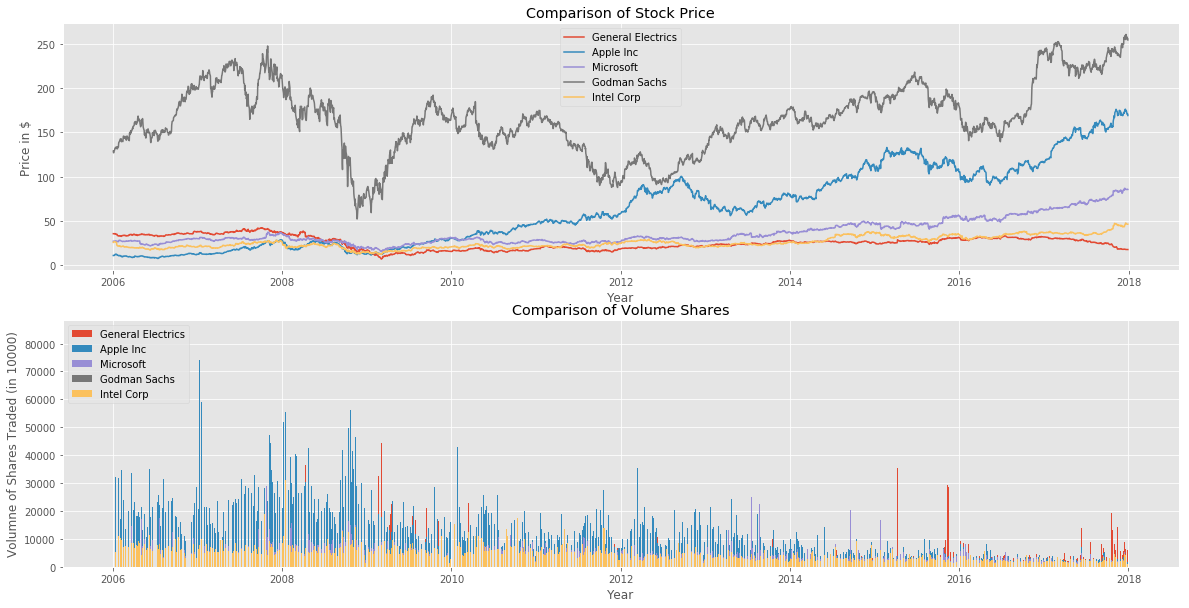

In [21]:
# File import
GE    = pd.read_csv("GE_2006-01-01_to_2018-01-01.csv")
AAPL  = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
MSFT  = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
GS    = pd.read_csv("GS_2006-01-01_to_2018-01-01.csv")
INTC  = pd.read_csv("INTC_2006-01-01_to_2018-01-01.csv")

GE['Date'] = pd.to_datetime(GE['Date'])
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
GS['Date'] = pd.to_datetime(GS['Date'])
INTC['Date'] = pd.to_datetime(INTC['Date'])

GE.set_index('Date',inplace =True)
AAPL.set_index('Date',inplace =True)
MSFT.set_index('Date',inplace =True)
GS.set_index('Date',inplace =True)
INTC.set_index('Date',inplace =True)

plt.figure(figsize=(20,10))

# Plot to compare the Close price for both the companies.
plt.subplot(2,1,1)
plt.plot(GE.index, GE['Close'], label = "General Electrics")
plt.plot(AAPL.index, AAPL['Close'], label = "Apple Inc")
plt.plot(MSFT.index, MSFT['Close'], label = "Microsoft")
plt.plot(GS.index, GS['Close'], label = "Godman Sachs")
plt.plot(INTC.index, INTC['Close'], label = "Intel Corp")
plt.xlabel("Year")
plt.ylabel("Price in $")
plt.title("Comparison of Stock Price")
plt.legend()

# Plot to compare the Share Volume for both the companies.
plt.subplot(2,1,2)
plt.bar(GE.index, GE['Volume']/10000, label = "General Electrics")
plt.bar(AAPL.index, AAPL['Volume']/10000, label = "Apple Inc")
plt.bar(MSFT.index, MSFT['Volume']/10000, label = "Microsoft")
plt.bar(GS.index, GS['Volume']/10000, label = "Godman Sachs")
plt.bar(INTC.index, INTC['Volume']/10000, label = "Intel Corp")
#plt.ylim(0,10000)
plt.xlabel("Year")
plt.ylabel("Volumne of Shares Traded (in 10000)")
plt.title("Comparison of Volume Shares")
plt.legend(loc="upper left")

### Slowing Moving Average for Trend Prediction 
#### ``General Electrics``, ``Apple``, ``Microsoft``, ``GoldmanSach`` & ``Intel Corporation`` (Last 100days)

#### A simple moving average (SMA )is an arithmetic moving average calculated by adding recent closing prices and then dividing that by the number of time periods in the calculation average. Moving averages are lagging indicators, they fit in the category of trend following indicators. The moving average gives more accurate results as the number of periods is increased.
#### For the below plot, 100 days has been used as rolling window.

3014    27748588.01
3015    27809470.41
3016    27818854.02
3017    27764952.68
3018    27662892.94
Name: Volume, dtype: float64


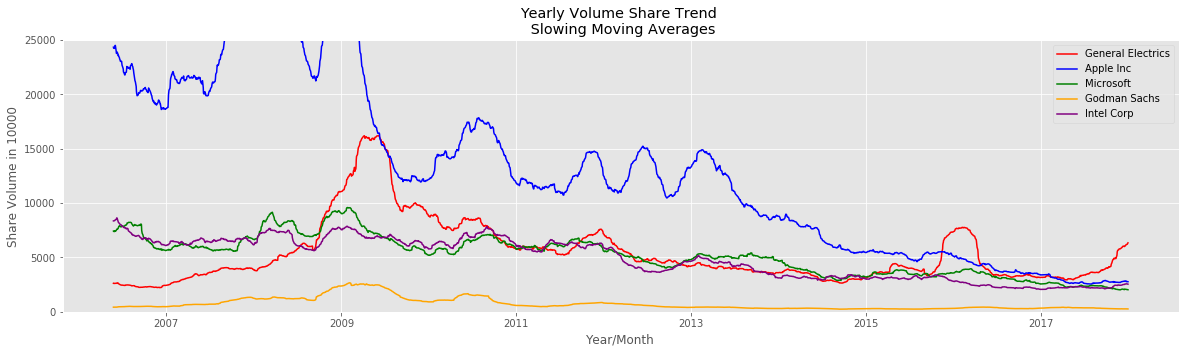

In [22]:
# File import
GE    = pd.read_csv("GE_2006-01-01_to_2018-01-01.csv")
AAPL  = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
MSFT  = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
GS    = pd.read_csv("GS_2006-01-01_to_2018-01-01.csv")
INTC  = pd.read_csv("INTC_2006-01-01_to_2018-01-01.csv")

GE2 = GE
GE['Date'] = pd.to_datetime(GE['Date'])
GE['Day'] = GE['Date'].dt.day
GE['Month'] = GE['Date'].dt.month
GE['MonthName'] = GE['Date'].dt.strftime("%B")
GE['Year'] = GE['Date'].dt.year
GE['Quarter'] = GE['Date'].dt.quarter

AAPL['Date'] = pd.to_datetime(AAPL['Date'])

# Calculating Moving Average Volume
GEsma100 = GE['Volume'].rolling(100).mean() #100 days
AAPLsma100 = AAPL['Volume'].rolling(100).mean() #100 days
MSFTsma100 = MSFT['Volume'].rolling(100).mean() #100 days
GSsma100 = GS['Volume'].rolling(100).mean() #100 days
INTCsma100 = INTC['Volume'].rolling(100).mean() #100 days

print(AAPLsma100.tail())
# Plotting of Volume of shares over the period
GE.set_index('Date',inplace =True)
AAPL.set_index('Date',inplace =True)
plt.figure(figsize=(20,5), linewidth=2)
plt.ylim(0, 25000)

# The slowing movie average has been scaled for 10K 
plt.plot(GE.index, GEsma100/10000, color ='r', label= "General Electrics")
plt.plot(AAPL.index, AAPLsma100/10000, color ='b', label= "Apple Inc")
plt.plot(AAPL.index, MSFTsma100/10000, color ='g', label= "Microsoft")
plt.plot(GE.index, GSsma100/10000, color ='orange', label= "Godman Sachs")
plt.plot(AAPL.index, INTCsma100/10000, color ='purple', label= "Intel Corp")
plt.xlabel("Year/Month")
plt.ylabel("Share Volume in 10000")
plt.title("Yearly Volume Share Trend \n Slowing Moving Averages")
plt.legend(loc="upper right")
plt.show()

### Distribution of Stock Price for ``General Electrics``, ``Apple``, ``Microsoft``, ``GoldmanSach`` & ``Intel Corporation``

#### The seaborn library has been imported. This is used to create the distribution plot for General Electrics, Apple, Microsoft, GoldmanSach & Intel Corporation. 

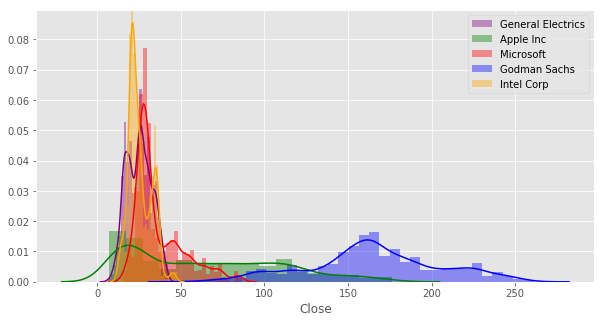

In [23]:
# File import
GE    = pd.read_csv("GE_2006-01-01_to_2018-01-01.csv")
AAPL  = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
MSFT  = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
GS    = pd.read_csv("GS_2006-01-01_to_2018-01-01.csv")
INTC  = pd.read_csv("INTC_2006-01-01_to_2018-01-01.csv")


plt.figure(figsize=(10,5))
sns.distplot(GE['Close'], color='purple', label="General Electrics")
sns.distplot(AAPL['Close'], color='green', label="Apple Inc")
sns.distplot(MSFT['Close'], color='red', label="Microsoft")
sns.distplot(GS['Close'], color='blue', label="Godman Sachs")
sns.distplot(INTC['Close'], color='orange', label="Intel Corp")

plt.legend(loc="upper right")

#### A new dataframe named ``Stock`` has been created which stores the closing price for ``General Electrics``, ``Apple``, ``Microsoft``, ``GoldmanSach`` & ``Intel Corporation``. ``Stock Return`` is calculated dividend of the Close price. ``Stock Change`` is calculated in terms of the logarithmic difference between the Close price. This shows how the stock price has changed for both the companies.

Text(0.5,1,'Stock Change Analysis')

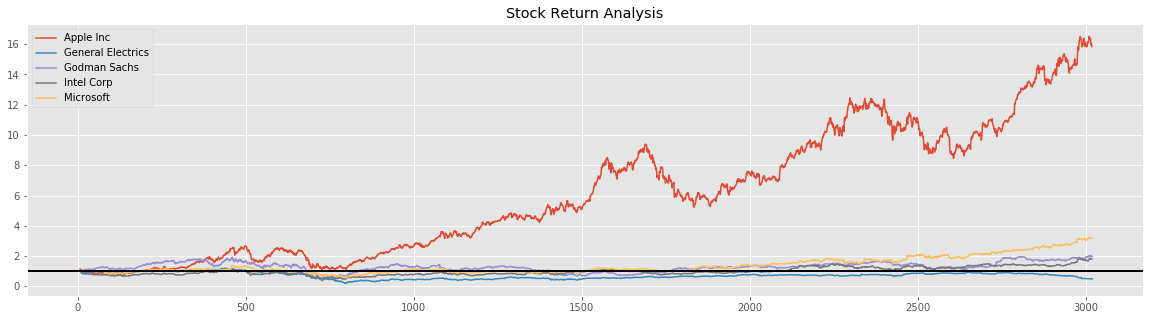

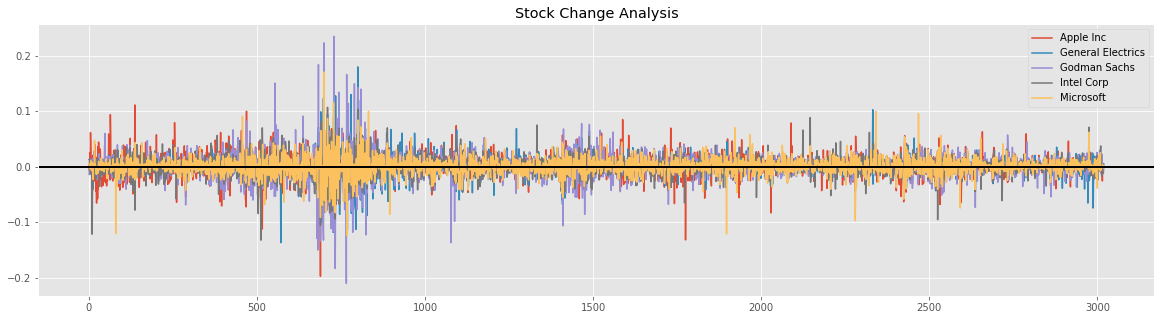

In [24]:
# File import
GE    = pd.read_csv("GE_2006-01-01_to_2018-01-01.csv")
AAPL  = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
MSFT  = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
GS    = pd.read_csv("GS_2006-01-01_to_2018-01-01.csv")
INTC  = pd.read_csv("INTC_2006-01-01_to_2018-01-01.csv")

# Creation of new dataframe with the Stock price of Amazon & Google
stocks = pd.DataFrame({"General Electrics": GE["Close"],"Apple Inc": AAPL["Close"],"Microsoft": MSFT["Close"],"Godman Sachs": GS["Close"],"Intel Corp": INTC["Close"]})

stock_return = stocks.apply(lambda x: x / x[0])

plt.figure(figsize=(20,5))
stock_return.plot(grid = True, figsize=(20,5)).axhline(y = 1, color = "black", lw = 2)
plt.title("Stock Return Analysis")

# Plot
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1
stock_change.plot(grid = True, figsize=(20,5)).axhline(y = 0, color = "black", lw = 2)
plt.title("Stock Change Analysis")